## Dynamic flux based analysis


#### Introductory stuff - import of various libraries needed for DFBA and the model

In [1]:
%run 01-model.ipynb

from dfba import DfbaModel, ExchangeFlux, KineticVariable
from dfba.plot.matplotlib import *

'' is not a valid SBML 'SId'.


### DFBA starts here

In [2]:
model.solver = "glpk"
dfba_model = DfbaModel(model)

In [3]:
model.medium

{'BOUNDARY_GLCe': 10.0,
 'BOUNDARY_H2Oe': 1000.0,
 'BOUNDARY_HNO3e': 1000.0,
 'BOUNDARY_O2e': 1000.0,
 'BOUNDARY_PIe': 1000.0,
 'BOUNDARY_SLFe': 1000.0,
 'BOUNDARY_Ke': 1000.0,
 'BOUNDARY_CAe': 1000.0}

In [4]:
X = KineticVariable("Biomass")
Gluc = KineticVariable("Glucose")
H2o = KineticVariable("Water")
NitrA = KineticVariable("Nitric Acid")
Oxy = KineticVariable("Oxygen")
Phos = KineticVariable("Phosphate")
Slf = KineticVariable("SLF")
Pota = KineticVariable("Potassium")
Calc = KineticVariable("Calcium")
Psi = KineticVariable("Psilocybin")


dfba_model.add_kinetic_variables([X, Gluc, H2o, NitrA, Oxy, Phos, Slf, Pota, Calc, Psi])

In [5]:
mu = ExchangeFlux("DRAIN_Biomass")
v_G = ExchangeFlux("BOUNDARY_GLCe")
v_W = ExchangeFlux("BOUNDARY_H2Oe")
v_N = ExchangeFlux("BOUNDARY_HNO3e")
v_O = ExchangeFlux("BOUNDARY_O2e")
v_P = ExchangeFlux("BOUNDARY_PIe")
v_S = ExchangeFlux("BOUNDARY_SLFe")
v_Po = ExchangeFlux("BOUNDARY_Ke")
v_C = ExchangeFlux("BOUNDARY_CAe")
v_Psi = ExchangeFlux("psiM")


dfba_model.add_exchange_fluxes([mu, v_G, v_W, v_N, v_O, v_P, v_S, v_Po, v_C, v_Psi])

In [6]:
dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * X / 1000.0)
dfba_model.add_rhs_expression("Water", v_W * X / 1000.0)
dfba_model.add_rhs_expression("Nitric Acid", v_N * X / 1000.0)
dfba_model.add_rhs_expression("Oxygen", v_O * X / 1000.0)
dfba_model.add_rhs_expression("Phosphate", v_P * X)
dfba_model.add_rhs_expression("SLF", v_S * X / 1000.0)
dfba_model.add_rhs_expression("Potassium", v_Po * X / 1000.0)
dfba_model.add_rhs_expression("Calcium", v_C * X / 1000.0)
dfba_model.add_rhs_expression("Psilocybin", v_Psi * X / 1000.0)

In [7]:
dfba_model.add_exchange_flux_lb("BOUNDARY_O2e", 15.0 * (Oxy / (0.024 + Oxy)), Oxy)

In [8]:
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.03,
        "Glucose": 4.0,
        "Water": 10.0,
        "Nitric Acid": 0.5,
        "Oxygen": 100.0,
        "Phosphate": 0.5,
        "SLF": 0.5,
        "Potassium":0.1,
        "Calcium": 0.1,
        "Psilocybin": 0.0
    }
)
concentrations, tradjectories = dfba_model.simulate(0.0, 10.0, 0.1, ["BOUNDARY_GLCe","BOUNDARY_HNO3e"])

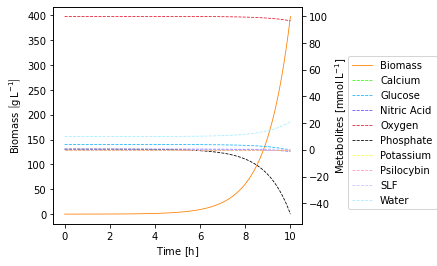

In [9]:
plot_concentrations(concentrations)